In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

In [11]:
df= pd.read_csv("../data/steam_cleaned.csv")

In [46]:
df['genres_list'] = df['genres'].astype(str).str.split(';')

In [47]:
from itertools import chain
all_genres = set(chain.from_iterable(df['genres_list'].dropna()))

In [48]:
all_genres


{'Action',
 'Adventure',
 'Animation & Modeling',
 'Audio Production',
 'Casual',
 'Design & Illustration',
 'Early Access',
 'Education',
 'Free to Play',
 'Game Development',
 'Gore',
 'Indie',
 'Massively Multiplayer',
 'Nudity',
 'Photo Editing',
 'RPG',
 'Racing',
 'Sexual Content',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Utilities',
 'Video Production',
 'Violent',
 'Web Publishing'}

In [49]:
for genre in all_genres:
    col_name = 'genre_' + genre.strip()
    df[col_name] = df['genres_list'].apply(lambda x: genre.strip() in x if isinstance(x, list) else False)

In [50]:
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']
df = df[df['total_ratings'] > 0]
df['positive_ratio'] = df['positive_ratings'] / df['total_ratings']

In [51]:
genre_ratios = {}

for genre in all_genres:
    col = 'genre_' + genre.strip()
    if col in df.columns:
        genre_df = df[df[col]]
        mean_ratio = genre_df['positive_ratio'].mean()
        genre_ratios[genre] = round(mean_ratio, 4)

In [54]:
genre_ratio_df = pd.DataFrame.from_dict(genre_ratios, orient='index', columns=['mean_positive_ratio'])
genre_ratio_df = genre_ratio_df.sort_values(by='mean_positive_ratio', ascending=False).reset_index().rename(columns={'index': 'genre'})


/var/folders/cf/gnzk5q4j3632j__pxxvtkjlh0000gn/T/ipykernel_15126/787731393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_genre_df, x='mean_positive_ratio', y='genre', palette='viridis')


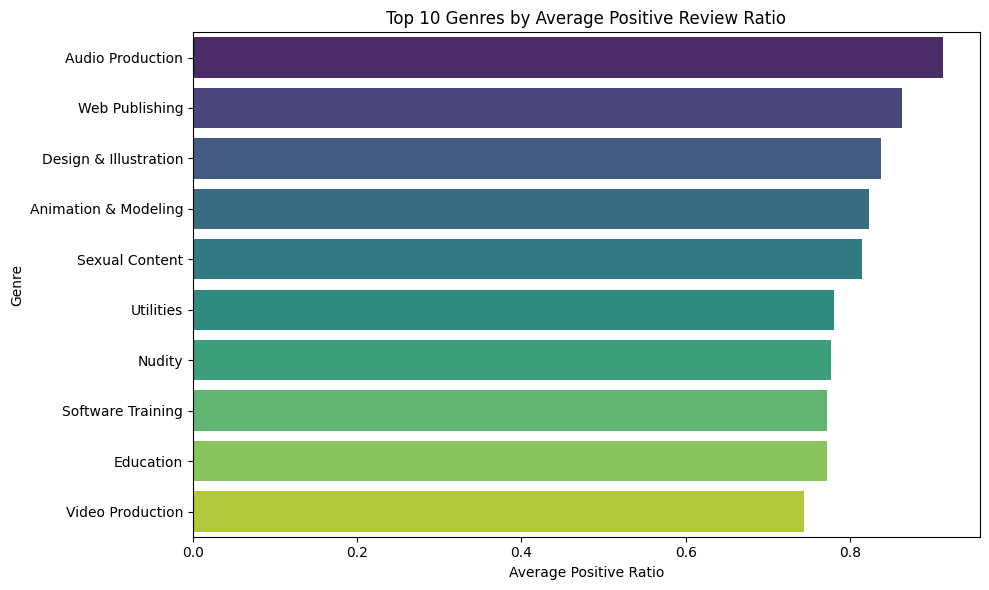

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10_genre_df, x='mean_positive_ratio', y='genre', palette='viridis')
plt.title('Top 10 Genres by Average Positive Review Ratio')
plt.xlabel('Average Positive Ratio')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig("../visuals/top10_genre_positive_review.png", dpi=300)
plt.show()

In [57]:
def to_markdown_table(df, column1='genre', column2='mean_positive_ratio'):
    lines = [f"| {column1.capitalize()} | {column2.replace('_', ' ').capitalize()} |",
             f"|{'-' * (len(column1)+2)}|{'-' * (len(column2)+2)}|"]
    
    for _, row in df.iterrows():
        lines.append(f"| {row[column1]} | {row[column2]:.4f} |")
    
    return "\n".join(lines)

In [58]:
genre_ratio_df_sorted = genre_ratio_df.sort_values(by='mean_positive_ratio', ascending=False)

markdown_table = to_markdown_table(genre_ratio_df_sorted)
print(markdown_table)

| Genre | Mean positive ratio |
|-------|---------------------|
| Audio Production | 0.9126 |
| Web Publishing | 0.8638 |
| Design & Illustration | 0.8377 |
| Animation & Modeling | 0.8230 |
| Sexual Content | 0.8150 |
| Utilities | 0.7802 |
| Nudity | 0.7768 |
| Software Training | 0.7716 |
| Education | 0.7716 |
| Video Production | 0.7439 |
| RPG | 0.7427 |
| Indie | 0.7421 |
| Adventure | 0.7400 |
| Game Development | 0.7376 |
| Action | 0.7332 |
| Strategy | 0.7325 |
| Casual | 0.7253 |
| Simulation | 0.7239 |
| Racing | 0.7200 |
| Sports | 0.7116 |
| Free to Play | 0.7095 |
| Early Access | 0.7065 |
| Violent | 0.6809 |
| Gore | 0.6726 |
| Massively Multiplayer | 0.6496 |
| Photo Editing | 0.6251 |
